# GPU vs CPU Performance 

# Install and import dependencies
We need the matplotlib to plot performance diagrams. 
Prefix the code with an exclamation mark to run system command. !pip3 installs Python dependencies.

In [1]:
!pip3 install matplotlib


[notice] A new release of pip is available: 23.2.1 -> 23.3.1
[notice] To update, run: python3 -m pip install --upgrade pip


In [12]:
import tensorflow as tf
import time
import matplotlib.pyplot as plt
import numpy as np

## Experiment 1 - Matrix size comparision

Let's first define a matrix size range for measurement. The code below performs measurements from size 5 to 10000, taking 50 steps between each measurement.

In [3]:
matrix_sizes = range(5, 20000, 100)

Implement a function that performs a matrix multiplication and return execution time.

In [4]:
def measure_time(size, device):
    A = tf.random.normal([size, size], dtype=tf.float32)
    B = tf.random.normal([size, size], dtype=tf.float32)

    with tf.device(device):
        start_time = time.time()
        C = tf.matmul(A, B)
        C.numpy()
        elapsed_time = time.time() - start_time
    
    return elapsed_time

Lets test the measure_time function.

In [6]:
print(measure_time(20000, '/GPU:0'))
print(measure_time(20000, '/CPU:0'))

0.8577773571014404
14.43545937538147


Now run the experiment.

In [7]:
cpu_times = []
gpu_times = []

has_gpu = tf.config.list_physical_devices('GPU')

for size in matrix_sizes:
    cpu_time = measure_time(size, '/CPU:0')
    cpu_times.append(cpu_time)
    
    if has_gpu:
        gpu_time = measure_time(size, '/GPU:0')
        gpu_times.append(gpu_time)
    else:
        gpu_times.append(None)
    
    print(f"Size: {size}, CPU time: {cpu_time}, GPU time: {gpu_time if has_gpu else 'N/A'}")

Size: 5, CPU time: 0.00017523765563964844, GPU time: 0.00012159347534179688
Size: 105, CPU time: 0.0001270771026611328, GPU time: 0.00012493133544921875
Size: 205, CPU time: 0.00025343894958496094, GPU time: 0.00019884109497070312
Size: 305, CPU time: 0.0003459453582763672, GPU time: 0.0002295970916748047
Size: 405, CPU time: 0.0005586147308349609, GPU time: 0.0002894401550292969
Size: 505, CPU time: 0.0008616447448730469, GPU time: 0.000293731689453125
Size: 605, CPU time: 0.001069784164428711, GPU time: 0.0003604888916015625
Size: 705, CPU time: 0.0072689056396484375, GPU time: 0.0005078315734863281
Size: 805, CPU time: 0.002288818359375, GPU time: 0.0005648136138916016
Size: 905, CPU time: 0.006336212158203125, GPU time: 0.0007977485656738281
Size: 1005, CPU time: 0.0033037662506103516, GPU time: 0.0007352828979492188
Size: 1105, CPU time: 0.00857853889465332, GPU time: 0.0012166500091552734
Size: 1205, CPU time: 0.005287885665893555, GPU time: 0.0011522769927978516
Size: 1305, CPU 

### Plot the result

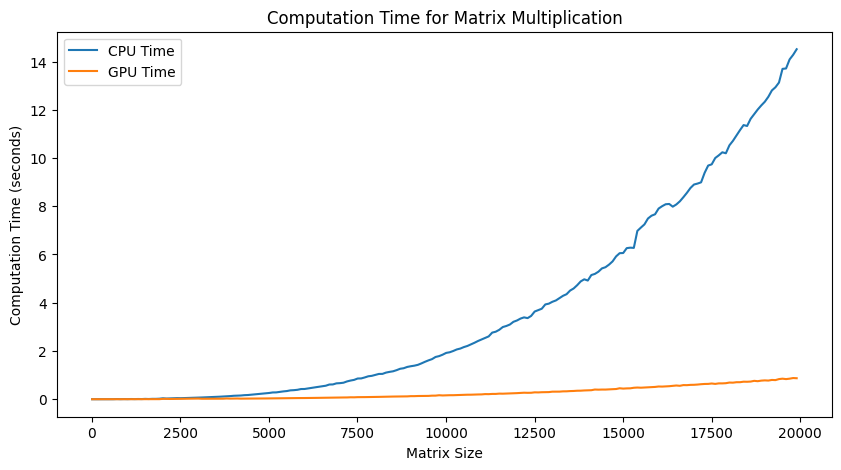

In [10]:
plt.figure(figsize=(10, 5))
plt.plot(matrix_sizes, cpu_times, label='CPU Time')
if has_gpu:
    plt.plot(matrix_sizes, gpu_times, label='GPU Time')
plt.xlabel('Matrix Size')
plt.ylabel('Computation Time (seconds)')
plt.title('Computation Time for Matrix Multiplication')
plt.legend()
plt.show()

## Experiment 2 - Matrix multiplication without data copy

It will take some time to transfer data to the GPU. Will we achieve better performance if we copy the matrices to the GPU just once and then perform the same multiplication repeatedly?

Total CPU time for 20 multiplications: 283.88187 seconds
Total GPU time for 20 multiplications: 16.45187 seconds


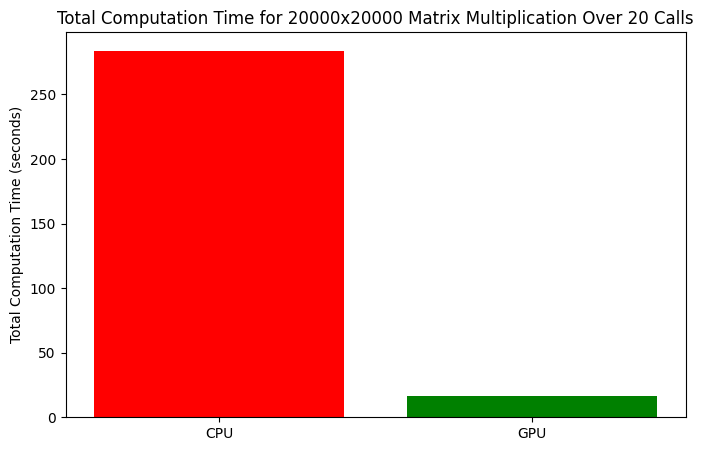

In [14]:
# Set the matrix size
matrix_sizes = 20000
num_calls = 20

# Function to perform multiple matrix multiplications and measure total time
def measure_total_time(A, B, device, num_calls):
    with tf.device(device):
        # Warm-up run
        tf.matmul(A, B).numpy()

        # Time multiple calls
        start_time = time.time()
        for _ in range(num_calls):
            tf.matmul(A, B).numpy()
        total_time = time.time() - start_time

    return total_time

# Check for GPU availability
has_gpu = tf.config.list_physical_devices('GPU')

# Allocate matrices on CPU
A_cpu = tf.random.normal([matrix_sizes, matrix_sizes], dtype=tf.float32)
B_cpu = tf.random.normal([matrix_sizes, matrix_sizes], dtype=tf.float32)

# Allocate matrices on GPU if available
if has_gpu:
    with tf.device('/GPU:0'):
        A_gpu = A_cpu
        B_gpu = B_cpu

# Measure total computation time on CPU
total_cpu_time = measure_total_time(A_cpu, B_cpu, '/CPU:0', num_calls)
print(f"Total CPU time for {num_calls} multiplications: {total_cpu_time:.5f} seconds")

# Measure total computation time on GPU
if has_gpu:
    total_gpu_time = measure_total_time(A_gpu, B_gpu, '/GPU:0', num_calls)
    print(f"Total GPU time for {num_calls} multiplications: {total_gpu_time:.5f} seconds")

    # Visualize the total CPU and GPU times with matplotlib
    plt.figure(figsize=(8, 5))
    bar_locations = np.arange(2)
    plt.bar(bar_locations, [total_cpu_time, total_gpu_time], color=['red', 'green'])
    plt.xticks(bar_locations, ['CPU', 'GPU'])
    plt.ylabel('Total Computation Time (seconds)')
    plt.title(f'Total Computation Time for {matrix_sizes}x{matrix_sizes} Matrix Multiplication Over {num_calls} Calls')
    plt.show()
else:
    print("GPU not available.")
